# Downloading Copernicus Marine SSH products

In [1]:
from importlib import reload
import os

import xarray
import copernicusmarine

from remote_sensing.download import podaac
from remote_sensing.healpix import rs_healpix
from remote_sensing.netcdf import utils as nc_utils

In [2]:
copernicusmarine.__version__

'2.0.0'

In [3]:
lon_lim = (127.,134)
lat_lim = (18.,23)

# Login

In [4]:
copernicusmarine.login(username=os.getenv('CM_USER'), password=os.getenv('CM_PASS'))

INFO - 2025-02-11T07:31:56Z - Credentials file stored in /home/xavier/.copernicusmarine/.copernicusmarine-credentials.


True

# Grab a dataset

In [7]:
response_default_service = copernicusmarine.subset(
    dataset_id="cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D",
    variables=["sla", "err_sla"],
    maximum_longitude=lon_lim[1],
    minimum_longitude=lon_lim[0],
    minimum_latitude=lat_lim[0],
    maximum_latitude=lat_lim[1],
    start_datetime="2025-02-10", end_datetime="2025-02-10", 
    file_format="netcdf",
    output_directory="data",
) 

INFO - 2025-02-11T07:37:22Z - Selected dataset version: "202411"
INFO - 2025-02-11T07:37:22Z - Selected dataset part: "default"
INFO - 2025-02-11T07:37:45Z - Starting download. Please wait...


  0%|          | 0/8 [00:00<?, ?it/s]

INFO - 2025-02-11T07:37:50Z - Successfully downloaded to data/cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_sla-err_sla_127.06E-133.94E_18.06N-22.94N_2025-02-10.nc


In [14]:
response_default_service

ResponseSubset(file_path=PosixPath('data/cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_sla-err_sla_127.06E-133.94E_18.06N-22.94N_2025-02-10.nc'), output_directory=PosixPath('data'), filename='cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_sla-err_sla_127.06E-133.94E_18.06N-22.94N_2025-02-10.nc', file_size=0.03419847328244275, data_transfer_size=18.76030534351145, variables=['sla', 'err_sla'], coordinates_extent=[GeographicalExtent(minimum=127.0625, maximum=133.9375, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=18.0625, maximum=22.9375, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-02-10T00:00:00+00:00', maximum='2025-02-10T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status='000', message='The request was successful.', file_status='DOWNLOADED')

In [15]:
response_default_service.filename

'cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_sla-err_sla_127.06E-133.94E_18.06N-22.94N_2025-02-10.nc'

# Explore it

In [8]:
ds = xarray.open_dataset('data/cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.125deg_P1D_sla-err_sla_127.06E-133.94E_18.06N-22.94N_2025-02-10.nc')
ds

<xarray.Dataset> Size: 36kB
Dimensions:    (time: 1, latitude: 40, longitude: 56)
Coordinates:
  * latitude   (latitude) float32 160B 18.06 18.19 18.31 ... 22.69 22.81 22.94
  * longitude  (longitude) float32 224B 127.1 127.2 127.3 ... 133.7 133.8 133.9
  * time       (time) datetime64[ns] 8B 2025-02-10
Data variables:
    sla        (time, latitude, longitude) float64 18kB ...
    err_sla    (time, latitude, longitude) float64 18kB ...
Attributes:
    references:                http://marine.copernicus.eu
    comment:                   Sea Surface Height measured by Altimetry and d...
    title:                     NRT merged all satellites Global Ocean Gridded...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    source:                    Altimetry measurements
    institution:               CLS, CNES
    Conventions:               CF-1.6
    history:                   2024-11-28 01:30:30Z: Creation
    copernicusmarine_version:  2.0.0

## Plot SLA

In [9]:
sla = ds.isel(time=0).sla
sla

<xarray.DataArray 'sla' (latitude: 40, longitude: 56)> Size: 18kB
[2240 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float32 160B 18.06 18.19 18.31 ... 22.69 22.81 22.94
  * longitude  (longitude) float32 224B 127.1 127.2 127.3 ... 133.7 133.8 133.9
    time       datetime64[ns] 8B 2025-02-10
Attributes:
    standard_name:  sea_surface_height_above_sea_level
    long_name:      Sea level anomaly
    units:          m

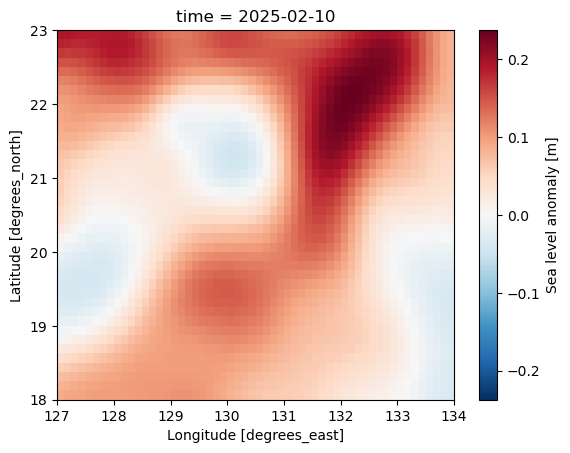

In [10]:
sla.plot()